In [10]:
import torch, tensornet
from tensornet.graph import GraphTensorNetwork
from gnnfp.utils import GraphFPDataset
from IPython.display import HTML, SVG
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage

INFO:rdkit:Enabling RDKit 2020.03.3 jupyter extensions
Using backend: pytorch


In [11]:
data_path = os.path.join(os.path.dirname(tensornet.__path__._path[0]), 'data/qm9.csv')
features_path = os.path.join(os.path.dirname(tensornet.__path__._path[0]), 'data/qm9/tree.db')
dataset = GraphFPDataset(data_path, features_path)

Processing new graphs


Fait un dictionnaire de fragments en keys et la liste des molécules qui les contiennent en values

In [35]:
fragments = {}
for datum in dataset:
    smile, graph, values, ones = datum
    for idx in range(len(graph.nodes_dict)):
        frag_smiles = graph.nodes_dict[idx]['smiles']
        try:
            fragments[frag_smiles] += [smile]
        except KeyError:
            fragments[frag_smiles] = [smile]

In [40]:
import json
with open('/home/vincent/code/scratch/smiles_frag.txt','w') as f:
    json.dump(fragments, f)

In [15]:
frag_list = list(fragments)
molecules = [Chem.MolFromSmiles(smile) for smile in frag_list]

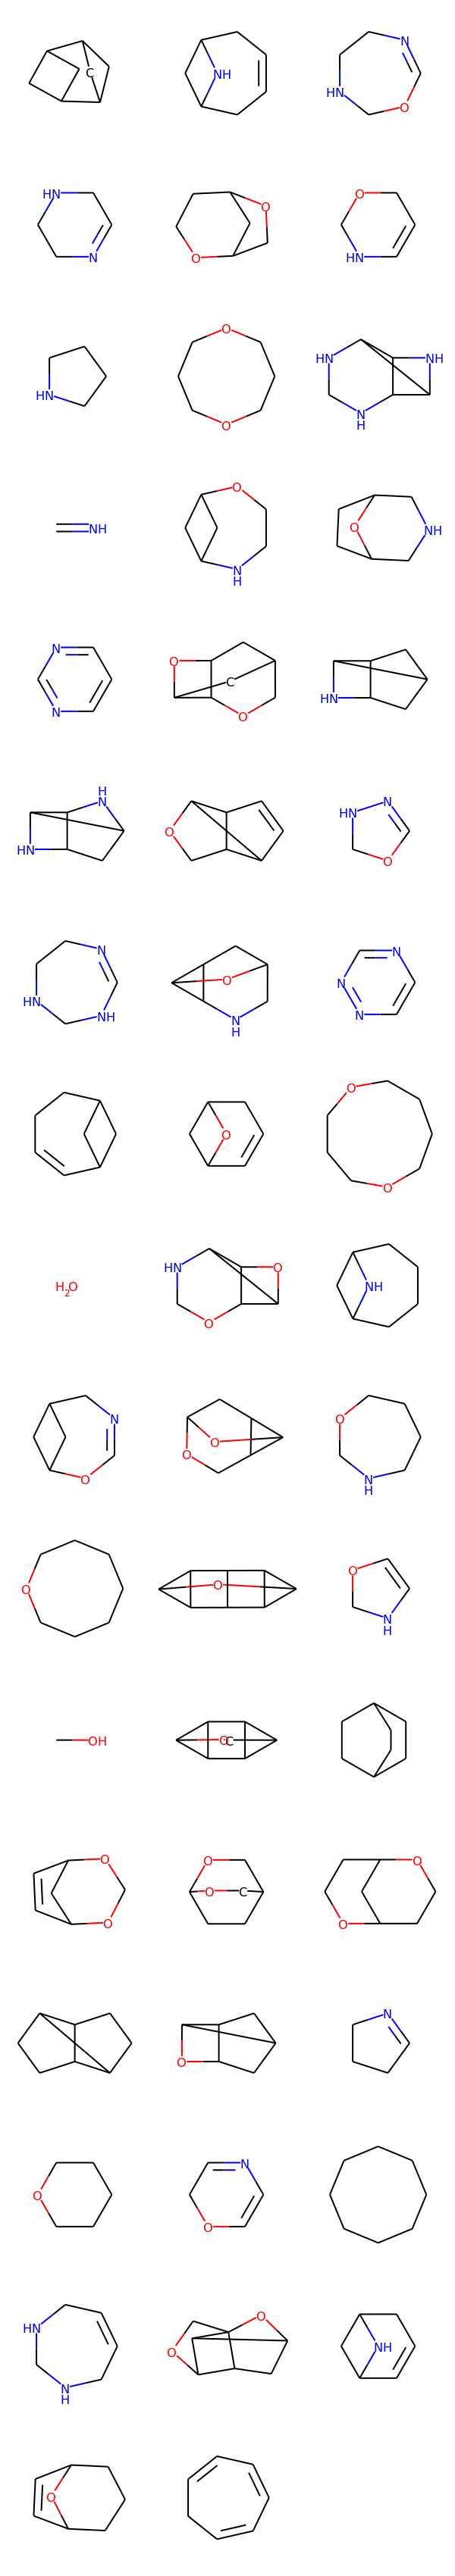

In [16]:
MolsToGridImage(molecules)

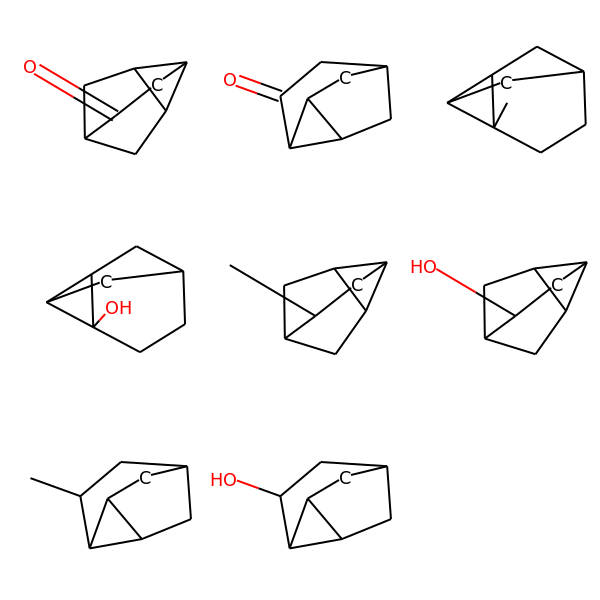

In [32]:
MolsToGridImage(fragments['C1CC2C3CC1CC23'])

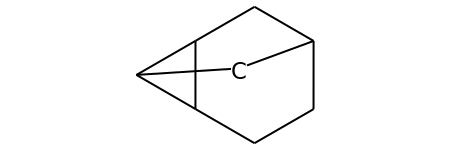

In [33]:
Chem.MolFromSmiles('C1CC2C3CC1CC23')